# serie 2

# exercice1

In [4]:
from tkinter.filedialog import askopenfilename
import wave

In [5]:
from tkinter import*

In [3]:
#1
def ouvrir_audio():
    root=Tk()
    fichier=askopenfilename()
    fich=wave.open(fichier,"rb")
    root.destroy()
    return fich

In [4]:
fich=ouvrir_audio()

# le nombre des pistes

In [5]:
#2
print( "le nombre de canaux:",fich.getnchannels())
if fich.getnchannels()==1:
    print("le son est mono")
elif fich.getnchannels()==2:
    print("le son est streo")
print("les paramètres sont:",fich.getparams())

le nombre de canaux: 2
le son est streo
les paramètres sont: _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=275925, comptype='NONE', compname='not compressed')


In [6]:
import numpy as np

# chaque piste dans un vecteur

In [7]:
#3:
def data(): 
    fich=ouvrir_audio()
    x=fich.readframes(-1)#en hexadecimal
    f=np.frombuffer(x,np.int16)
    return f

In [8]:
f=data()

In [9]:
piste1=f[0:len(f):2]
piste2=f[1:len(f):2]
print("piste 1 est :",piste1)
print("piste 2 est:",piste2)

piste 1 est : [ 0  0 -1 ...  0  0  0]
piste 2 est: [0 2 4 ... 0 0 0]


# presentation graphique

In [10]:
import matplotlib.pyplot as plt

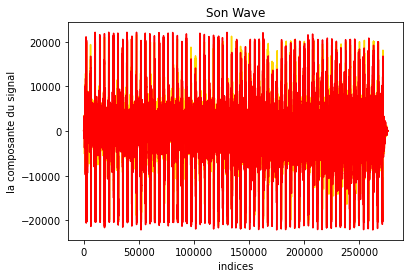

In [11]:
#4
#sur meme graphe
plt.title("Son Wave")
plt.ylabel("la composante du signal")
plt.xlabel("indices")
plt.plot(piste1,color="gold")
plt.plot(piste2,color="red")
plt.savefig("squares.png")
plt.show()

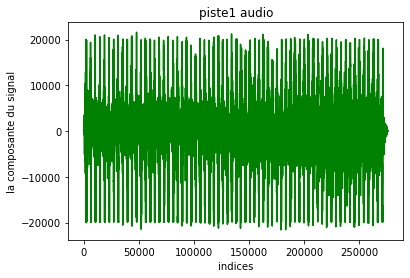

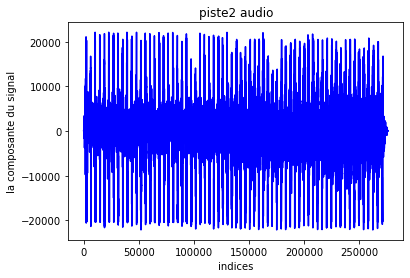

In [12]:
#de manière séparés:
plt.plot(piste1,color='green')
plt.xlabel("indices")
plt.ylabel("la composante du signal")
plt.title("piste1 audio")
plt.show()
plt.plot(piste2,color='blue')
plt.xlabel("indices")
plt.ylabel("la composante du signal")
plt.title("piste2 audio")
plt.show()

# une partie d'un piste

In [13]:
#5:
part1=piste1[500:50000]
print(part1)

[2362 2399 2354 ... 2134 1932 1651]


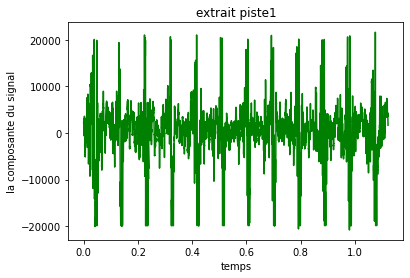

In [14]:
#6
fe=fich.getframerate()
te=1/fe
list=[i*te for i in range(0,len(part1))]
plt.title("extrait piste1")
plt.ylabel("la composante du signal")
plt.xlabel("temps")
plt.plot(list,part1,color="green") 
plt.show()

# ecouter les signaux

In [15]:
import sounddevice as sd

In [16]:
#7:
#pour ecouter a un audio:
sd.play(f)

In [17]:
#pour ecouter les deux pistes d'un audio:
sd.play(piste1)

In [18]:
sd.play(piste2)

In [19]:
#pour ecouter une extraire d'une piste audio:
sd.play(part1)

# générer des fichiers.wav a chaque extrait

In [20]:
#8
wav_file=wave.open("piste1.wav","w")
wav_file.setparams((1,2,44100,len(piste1),"NONE","not compressed"))
wav_file.writeframes(piste1.tobytes())

In [21]:
wav_file=wave.open("piste2.wav","w")
wav_file.setparams((1,2,44100,len(piste2),"NONE","not compressed"))
wav_file.writeframes(piste2.tobytes())

# le son séparément sur chacun des baffes

In [22]:
#9
list1=f.tolist()
for i in range(len(f)//3,2*len(f)//3):
     if i%2==0:
        list1[i]=0
for i in range(len(f)//3):
    if i%2!=0:
        list1[i]=0
list1=np.array(list1)
list1=list1.astype("int16")
file_wav=wave.open("droite_gauche.wav","w")
file_wav.setparams((2,2,44100,len(list1),"NONE","not compressed"))
file_wav.writeframes(list1.tobytes())

# exercice 2:

# les informations du fichier audio et sa taille

In [23]:
def info_audio():
    parametres=fich.getparams()
    taille=parametres[0]*parametres[2]*(parametres[3]/parametres[2])*parametres[1]
    return parametres,taille

In [24]:
info,taille=info_audio()
print("les parametres audio sont:",info)
print("la taille audio est :",taille)

les parametres audio sont: _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=275925, comptype='NONE', compname='not compressed')
la taille audio est : 1103700.0


# modifier le volume 

In [25]:
#2
def modifier_volume():
    f=data()
    p=int(input("entrer 0 ou 1:"))#pour augmenter le volume entrer 1 et pour diminuer le volume entrer 0
    if p==1:
        volume=f*100000
    elif p==0:
        volume=f/100000
    return volume

In [26]:
volume=modifier_volume()

entrer 0 ou 1:1


In [27]:
sd.play(volume)

In [28]:
# si on augmente l'amplitude des signaux audio,le volume de lecture augmente.et si on diminue l'amplitude des signaux audio,le volume de lecture diminue  

# Sous-échantilloner un signal successivement aux fréquences Fs/2 , Fs/4 , Fs/8

In [29]:
#3
#a
def sous_echantillonage():
    f=data()
    echantillon1=f[0:-1:2]
    echantillon2=f[0:-1:4]
    echantillon3=f[0:-1:8]
    return echantillon1,echantillon2,echantillon3

In [30]:
a,b,c=sous_echantillonage()

In [31]:
sd.play(a)

In [32]:
sd.play(b)

In [33]:
sd.play(c)

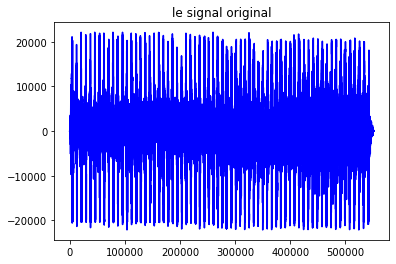

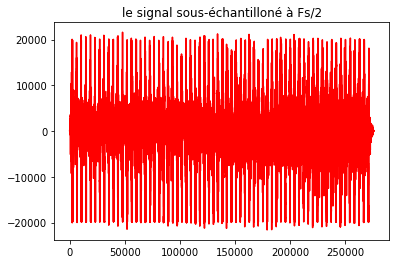

In [34]:
#3
#b
plt.plot(f,color="blue")
plt.title("le signal original")
plt.show()
plt.plot(a,color='red')
plt.title("le signal sous-échantilloné à Fs/2")
plt.show()

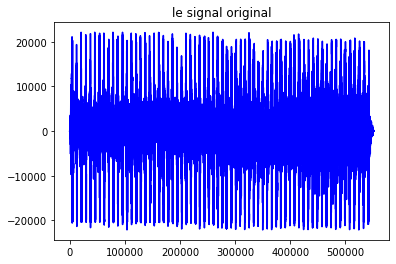

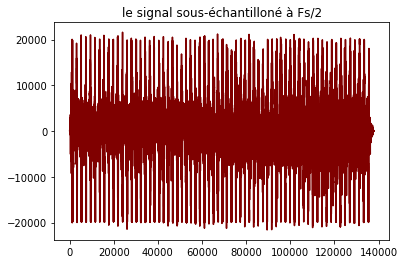

In [35]:
plt.plot(f,color="blue")
plt.title("le signal original")
plt.show()
plt.plot(b,color='maroon')
plt.title("le signal sous-échantilloné à Fs/2")
plt.show()

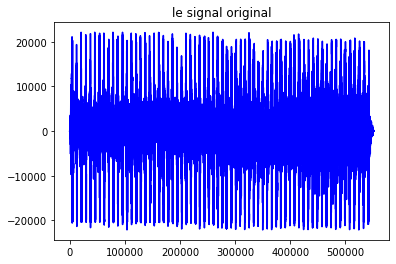

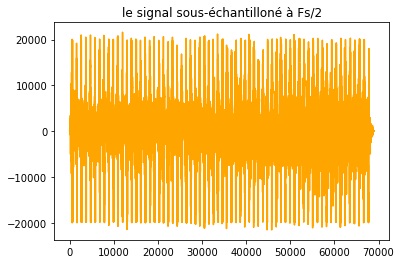

In [36]:
plt.plot(f,color="blue")
plt.title("le signal original")
plt.show()
plt.plot(c,color='orange')
plt.title("le signal sous-échantilloné à Fs/2")
plt.show()

In [37]:
#plus il y a d’échantillons pris par seconde,plus la qualité de l’audio est élevée

In [38]:
#c
fe=info[2]
fmax1=fe/2
Duree=(info[3]/fe)
taille1=info[0]*info[1]*Duree*fmax1
print("la freéquence avant échantillonnage :",fe)
print("la taille avant échantillonnage est:",taille,"octets")
print("la frequence maximale restituable:",fmax1)
print("la taille du nouveau fichier est :",taille1,"octets")
fmax2=fe/4
taille2=info[0]*info[1]*Duree*fmax2
print("la frequence maximale restituable :",fmax2)
print("la taille du nouveau fichier est:",taille2,"octets")
fmax3=fe/8
taille3=info[0]*info[1]*Duree*fmax3
print("la frequence maximale restituable :",fmax3)
print("la taille du nouveau fichier est:",taille3,"octets")

la freéquence avant échantillonnage : 44100
la taille avant échantillonnage est: 1103700.0 octets
la frequence maximale restituable: 22050.0
la taille du nouveau fichier est : 551850.0 octets
la frequence maximale restituable : 11025.0
la taille du nouveau fichier est: 275925.0 octets
la frequence maximale restituable : 5512.5
la taille du nouveau fichier est: 137962.5 octets


In [39]:
import soundfile as sf

# la quantification

In [41]:
#abcd
#fichier original
print("La valeur maximale originale est :",np.max(f))# la valeur minimale et maximale original
print("et La valeur minimale originale est :",np.min(f))
sd.play(f)#pour ecouter les signaux original

La valeur maximale originale est : 22143
et La valeur minimale originale est : -22144


In [42]:
#a
#reecrire les signaux re-quantifie dans des nouveaux fichiers
def quantification():
        root=Tk()
        audio=askopenfilename()
        data,fs=sf.read(audio)
        sf.write("helico_8.wav",data,fs,subtype='PCM_U8')#sur 8bits
        sf.write("helico_24.wav",data,fs,subtype='PCM_24')#sur 24bits
        sf.write("helico_32.wav",data,fs,subtype='PCM_32')#sur 32bits
        root.destroy()

In [43]:
quantification()

#  convertir en 8 bits

In [44]:
fich=ouvrir_audio()
y=fich.readframes(-1)
f1=np.frombuffer(y,np.int8)
f1=f1.astype('int8')
sd.play(f1)#pour ecouter les signaux quantifier en 8bits
print("La valeur maximale codable sur 8 bits: ",np.max(f1))#La valeur maximale et minimale codable sur 8 bits
print("La valeur minimale codable sur 8 bits: ",np.min(f1))

La valeur maximale codable sur 8 bits:  127
La valeur minimale codable sur 8 bits:  -128


# calculer le facteur de compression(8bits)

In [45]:
def taille_audio():
    audio=ouvrir_audio()
    parametres=audio.getparams()
    taille=parametres[0]*parametres[2]*(parametres[3]/parametres[2])*parametres[1]
    return taille

In [46]:
taille_original=taille_audio()# enter le fichier original et quantifier 
taille_quantif=taille_audio()
print("Le facteur de compression pour 8 bits est:",taille_quantif/taille_original)

Le facteur de compression pour 8 bits est: 0.5


# convertir en 32 bits

In [47]:
fich=ouvrir_audio()
y=fich.readframes(-1)
f2=np.frombuffer(y,np.int32)
f2=f2.astype('int32')
sd.play(f2)#pour ecouter
print("La valeur maximale codable: ",np.max(f2))#La valeur maximale et minimale codable sur 32 bits
print("La valeur minimale codable: ",np.min(f2))

La valeur maximale codable:  1451163964
La valeur minimale codable:  -1451163678


# calculer le facteur de compression(32bits)

In [48]:
taille_original=taille_audio()
taille_quantif=taille_audio()
print("Le facteur de compression pour 32 bits est:",taille_quantif/taille_original)

Le facteur de compression pour 32 bits est: 2.0


# calculer le facteur de compression(24bits)

In [49]:
taille_original=taille_audio()
taille_quantif=taille_audio()
print("Le facteur de compression pour 24 bits est:",taille_quantif/taille_original)

Le facteur de compression pour 24 bits est: 1.5


In [50]:
#l'amplitude:la variation d'amplitude permet de renforcer ou d’atténuer un signal audio

In [51]:
#la fréquence d’échantillonnage:La taille du fichier dépend de la fréquence d’échantillonnage,plus la fréquence d’échantillonnage est élevée, plus vos fichiers audio seront volumineux et la qualité perceptive augmente

In [52]:
#l'effet de la variation du pas de quantification d'un signal audio:lorsque on code le signal sur moins de bit(par rapport de nombre des bits normal qui codent le signal) par exemple dans ce cas le signal quantifie sur 8bit l'information est perdue donc la qualité perceptive diminue,par contre le signal quantifie sur 32bit

# exercice 3: compression des signaux audio

In [1]:
from pydub import AudioSegment
import os

# convertir un fichier audio non compresse vers un autre en adoptant une compression sans perte

In [6]:
#1#5
def compression_sans_perte(fichier_out): 
    root=Tk()
    fichier_in=askopenfilename()#choisir un fichier audio wave
    sound=AudioSegment.from_file(fichier_in) 
    sound.export(fichier_out,format="flac")#de wave vers flac
    taux_compression=os.path.getsize(fichier_in)/os.path.getsize(fichier_out)
    root.destroy()
    return taux_compression

In [7]:
compression_sans_perte("helicoptere.flac")

1.7389318003872274

# convertir un fichier audio non compresse vers un autre en adoptant une compression avec perte

In [8]:
#2#5
def compression_avec_perte(fichier_out): 
    root=Tk()
    fichier_in=askopenfilename()#choisir un fichier audio wave
    sound=AudioSegment.from_file(fichier_in) 
    sound.export(fichier_out,format="mp3")#de wave vers mp3
    taux_compression=os.path.getsize(fichier_in)/os.path.getsize(fichier_out)
    root.destroy()
    return taux_compression

In [9]:
compression_avec_perte("helicoptere.mp3")

10.930967211653677

# convertir un fichier audio compresse sans perte vers un autre en adoptant une compression avec perte

In [10]:
#3#5
def compression_avec_perte(fichier_out):
    root=Tk()
    fichier_in=askopenfilename()#choisir un fichier audio flac
    sound=AudioSegment.from_file(fichier_in) 
    sound.export(fichier_out,format="mp3")#de flac vers mp3
    taux_compression=os.path.getsize(fichier_in)/os.path.getsize(fichier_out)
    root.destroy()
    return taux_compression

In [11]:
compression_avec_perte("audio3_flac.mp3")

6.286024103544231

# convertir un fichier audio compresse avec perte vers un autre en adoptant une compression sans perte

In [12]:
#4#5
def compression_sans_perte(fichier_out):
    root=Tk()
    fichier_in=askopenfilename()#choisir un fichier audio mp3
    sound=AudioSegment.from_file(fichier_in) 
    sound.export(fichier_out,format="mp3")#de mp3 vers flac
    taux_compression=os.path.getsize(fichier_in)/os.path.getsize(fichier_out)
    root.destroy()
    return taux_compression

In [13]:
compression_sans_perte("allpass.flac")

2.666172930938715

In [14]:
import time

# lire tous les fichiers audio existant dans un repertoire

In [82]:
def lire_repertoire(path):
    sound=[]
    for root,dirs,files in os.walk(path):
         for i in files:
                audio=os.path.join(root,i)
                sound.append(audio)
    for j in sound:
        os.startfile(j)
        time.sleep(10)

In [ ]:
lire_repertoire(r"C:\Users\a\Desktop\Audio_Files")#mettre le path de fichier